<a href="https://colab.research.google.com/github/pragneshrana/LearnDataScience/blob/main/GNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Link: 

1.   https://arxiv.org/pdf/1812.08434.pdf
2.   https://arxiv.org/abs/2011.02260


Graph neural networks (GNNs) are connectionist models that capture the dependence of graphs via message passing between the nodes of graphs. Graph neural networks (GNNs) are connectionist models that capture the dependence of graphs via message passing between the nodes of graphs.

Application:

* Image classification by word embedding using ZSL

  Zero shot learning (ZSL) refers to trying to learn to recognise classes that the model has not encountered in its training.
* Text : text classification, sequence labelling, machine translation, relation and event extraction
* Combinatorial Optimization: minimum vertex cover problem, maximum cut, the travelling salesman problem, minimum spanning tree, etc.
*   Recommender Systems
*   Social influence prediction
* Medica/Pharmacy 
*   https://arxiv.org/pdf/1812.08434.pdf


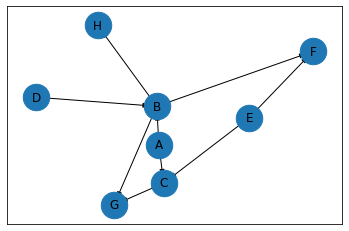

In [9]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()
G.add_edges_from(
    [('A', 'B'), ('A', 'C'), ('D', 'B'), ('E', 'C'), ('E', 'F'),
     ('B', 'H'), ('B', 'G'), ('B', 'F'), ('C', 'G')])



pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, cmap=plt.get_cmap('jet'), node_size = 700)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos, arrows=True)
plt.show()

#### The adjacency matrix from the above graph can be written as,
$
\begin{matrix}
&A&B & C & D & E & F & G & H\\
\end{matrix} \\
\begin{matrix}
A\\
B\\
C\\
D\\
E\\
F\\
G\\
H\\ 
\end{matrix}
\begin{bmatrix}
0 & 1 & 1 & 0 & 0 & 0 & 0 & 0\\
1 & 0 & 0 & 1 & 0 & 1 & 1 & 1\\
1 & 0 & 0 & 0 & 1 & 0 & 1 & 0\\
0 & 1 & 0 & 0 & 0 & 0 & 0 & 0\\
0 & 0 & 1 & 0 & 0 & 1 & 0 & 0\\
0 & 1 & 0 & 0 & 1 & 0 & 0 & 0\\
0 & 1 & 1 & 0 & 0 & 0 & 0 & 0\\
0 & 1 & 0 & 0 & 0 & 0 & 0 & 0\\
\end{bmatrix}
$

### Example of application


*   Node level prediction -- Data about unlabelled nodel. (Will he/she smoke?)
*   Edge level (link) prediction -- What will be next netflix video?
*  Graph level prediction --- Is this module suitable for this customer



## Problems with graph

neutral-network-diagram.svg

- Input to the neural-net is fixed but graphs size can arbitarily grow.

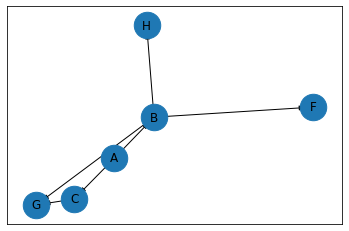

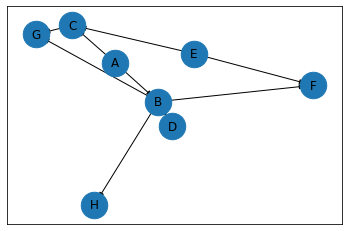

In [11]:
import networkx as nx
import matplotlib.pyplot as plt
G = nx.DiGraph()
G.add_edges_from(
    [('A', 'B'), ('A', 'C'), ('B', 'H'), ('B', 'G'), ('B', 'F'), ('C', 'G')])



pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, cmap=plt.get_cmap('jet'), node_size = 700)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos, arrows=True)
plt.show()

G = nx.DiGraph()
G.add_edges_from(
    [('A', 'B'), ('A', 'C'), ('D', 'B'), ('E', 'C'), ('E', 'F'),
     ('B', 'H'), ('B', 'G'), ('B', 'F'), ('C', 'G')])



pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, cmap=plt.get_cmap('jet'), node_size = 700)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos, arrows=True)
plt.show()

## Iso-morphism
- The rotation of graph will change the orientation and order of rows in input matrix. 
We can't directly feed matrix to the neural-net


Also, Adjacency matix include node information but nothing about edges, how far or close they are!

Representation Learning -- Represent graph data such that each node know about all other connected nodes.

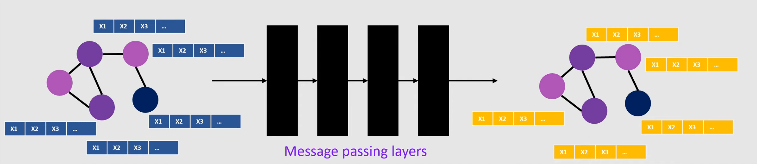

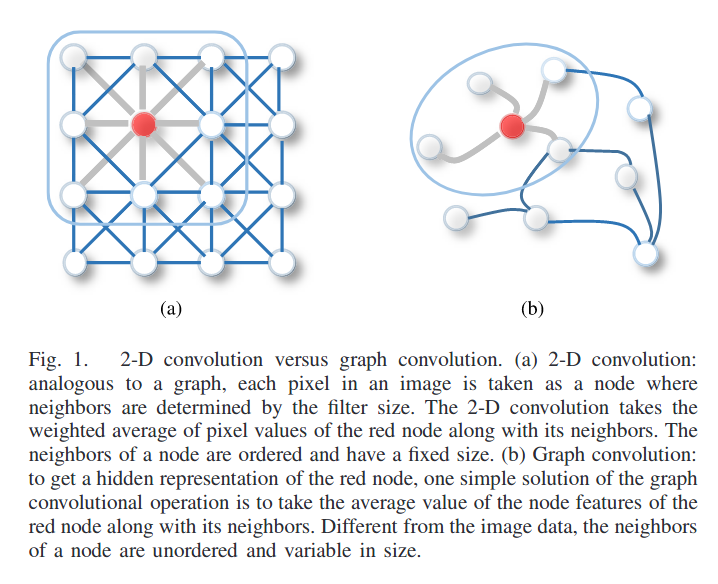

Ref: Wu, Z., Pan, S., Chen, F., Long, G., Zhang, C. and Philip, S.Y., 2020. A comprehensive survey on graph neural networks. IEEE transactions on neural networks and learning systems, 32(1), pp.4-24.

Useful problem that can be formulated from graph:
